In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
filterwarnings('ignore')

In [38]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()


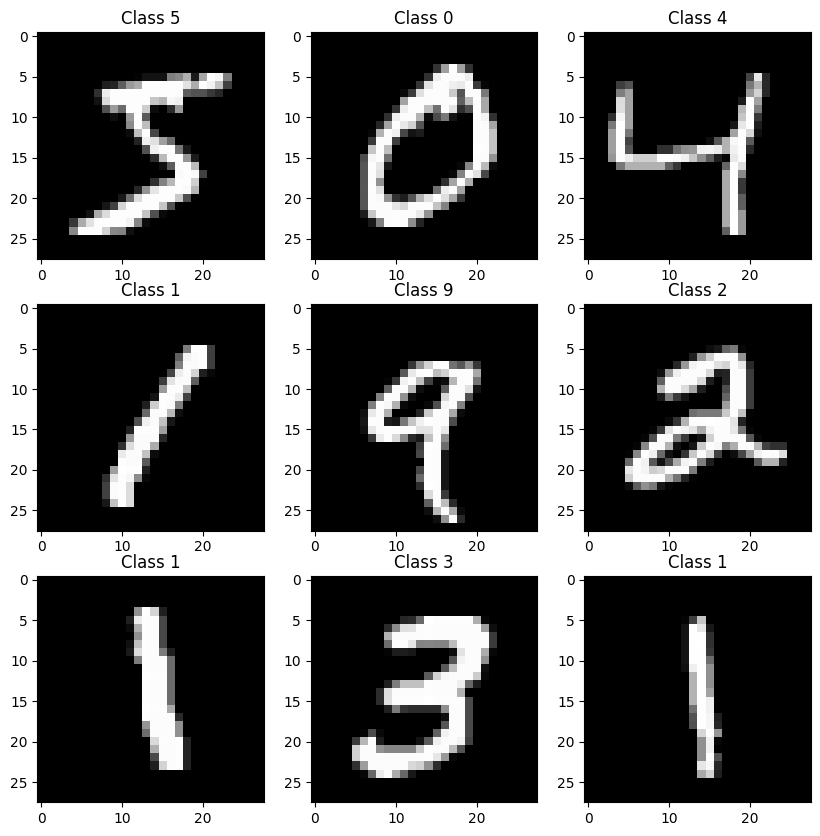

In [39]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap='gray',interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [40]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)/255
X_test = X_test.reshape(X_test.shape[0],28,28,1)/255
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [41]:
from sklearn.model_selection import train_test_split

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(60000, 28, 28, 1)
(60000, 10)
(5000, 28, 28, 1)
(5000, 10)
(5000, 28, 28, 1)
(5000, 10)


Build Model

In [43]:
def build_model(input_shape):
    input = keras.Input(shape=input_shape)
    x = layers.Conv2D(32,3,activation='relu')(input)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.Flatten()(x)
    
    x = layers.Dense(64,activation='relu')(x)
    output = layers.Dense(10,activation='softmax')(x)
    
    model = keras.Model(input,output)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [44]:
MnistClassifier = build_model((28,28,1))

I0000 00:00:1734027944.384043   77603 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3588 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [45]:
MnistClassifier.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = MnistClassifier.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/10


I0000 00:00:1734027969.544045   79674 service.cc:148] XLA service 0x7f1674004760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734027969.544122   79674 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-12-12 21:26:09.589239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734027969.757850   79674 cuda_dnn.cc:529] Loaded cuDNN version 90300


 38/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4002 - loss: 1.9705

I0000 00:00:1734027973.438092   79674 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8716 - loss: 0.4342 - val_accuracy: 0.9846 - val_loss: 0.0519
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9832 - loss: 0.0537 - val_accuracy: 0.9878 - val_loss: 0.0362
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9904 - val_loss: 0.0335
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9888 - val_loss: 0.0359
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9932 - loss: 0.0190 - val_accuracy: 0.9904 - val_loss: 0.0298
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9896 - val_loss: 0.0321
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9892 - val

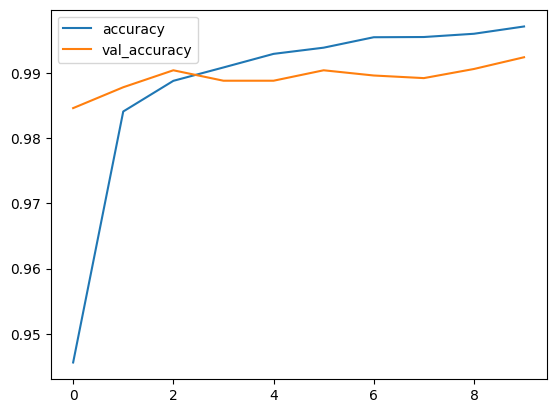

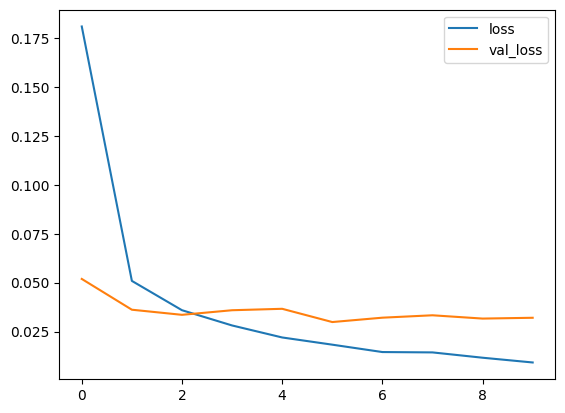

In [47]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [48]:
loss,acc = MnistClassifier.evaluate(X_test,y_test)
print("Test accuracy is : ",acc)
print("Test loss is : ",loss)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0380
Test accuracy is :  0.9926000237464905
Test loss is :  0.0310414619743824


  1/157 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


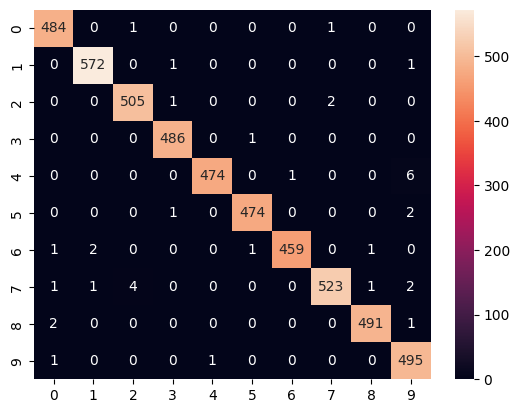

In [53]:
preds = MnistClassifier.predict(X_test)
preds = np.argmax(preds,axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

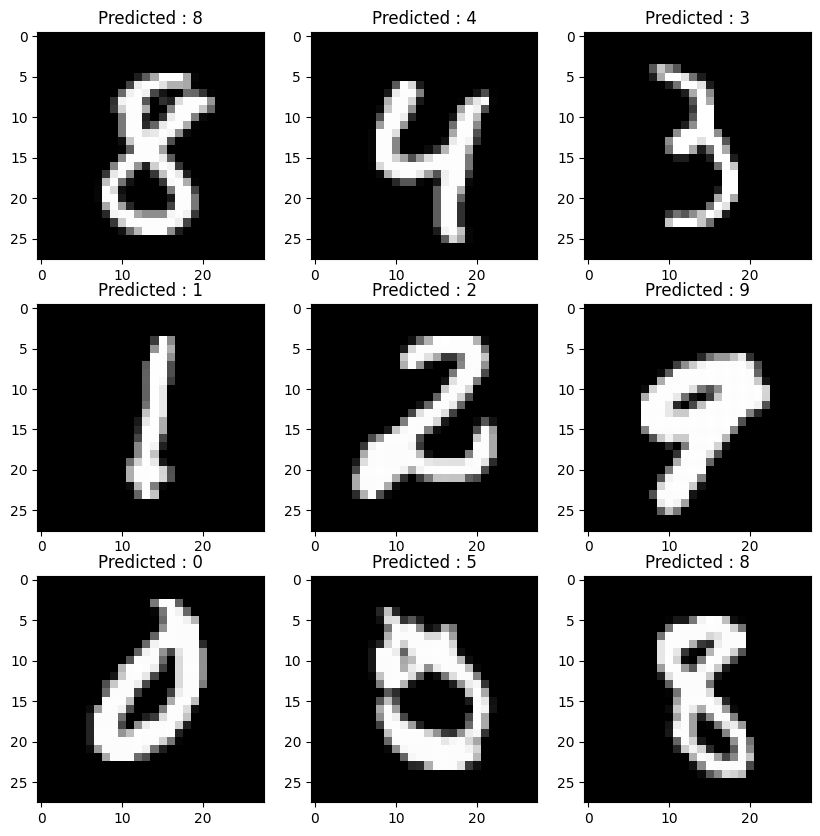

In [55]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray',interpolation='none')
    plt.title(f"Predicted : {preds[i]}")
plt.show()

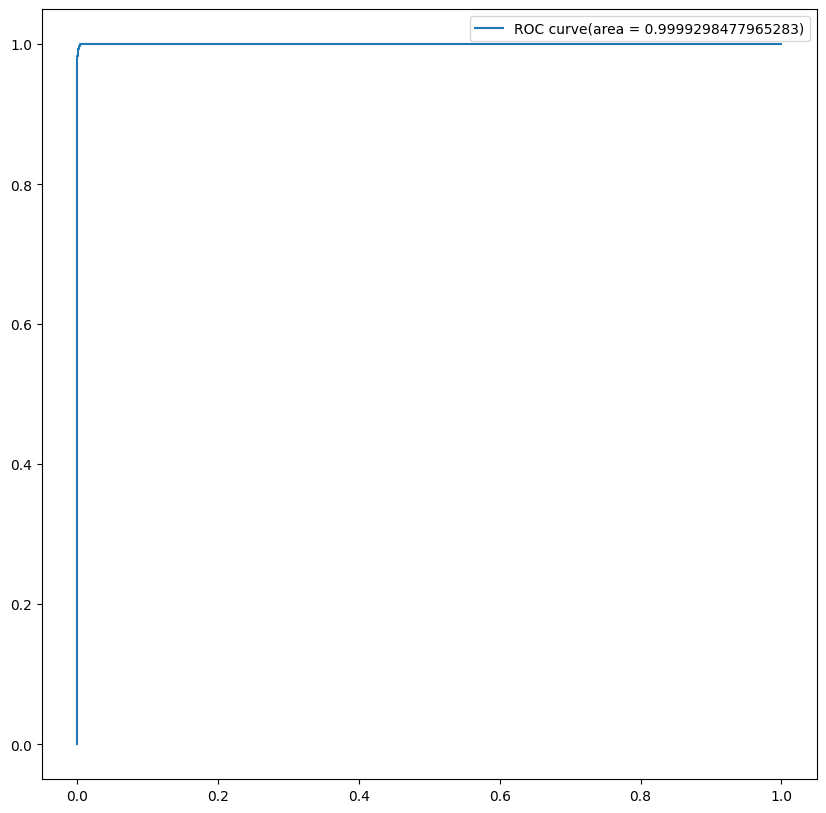

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test,classes=[0,1,2,3,4,5,6,7,8,9])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],preds[:,i])
    roc_auc[i] = roc_auc_score(y_test[:,i],preds[:,i])
    
plt.figure(figsize=(10,10))

plt.plot(fpr[i],tpr[i],label=f"ROC curve(area = {roc_auc[i]})")
plt.legend()
plt.show()

    